In [1]:
 import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2022-08-03 11:42:01--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-08-03 11:42:01 (35.4 MB/s) - ‘moore.csv’ saved [2302/2302]



In [3]:
!ls

moore.csv  sample_data


In [4]:
data = pd.read_csv('moore.csv')
data.head()

,1971,2300
0,1972,3500
1,1973,2500
2,1973,2500
3,1974,4100
4,1974,4500


In [5]:
X = data.iloc[:,0]
y = data.iloc[:,1]

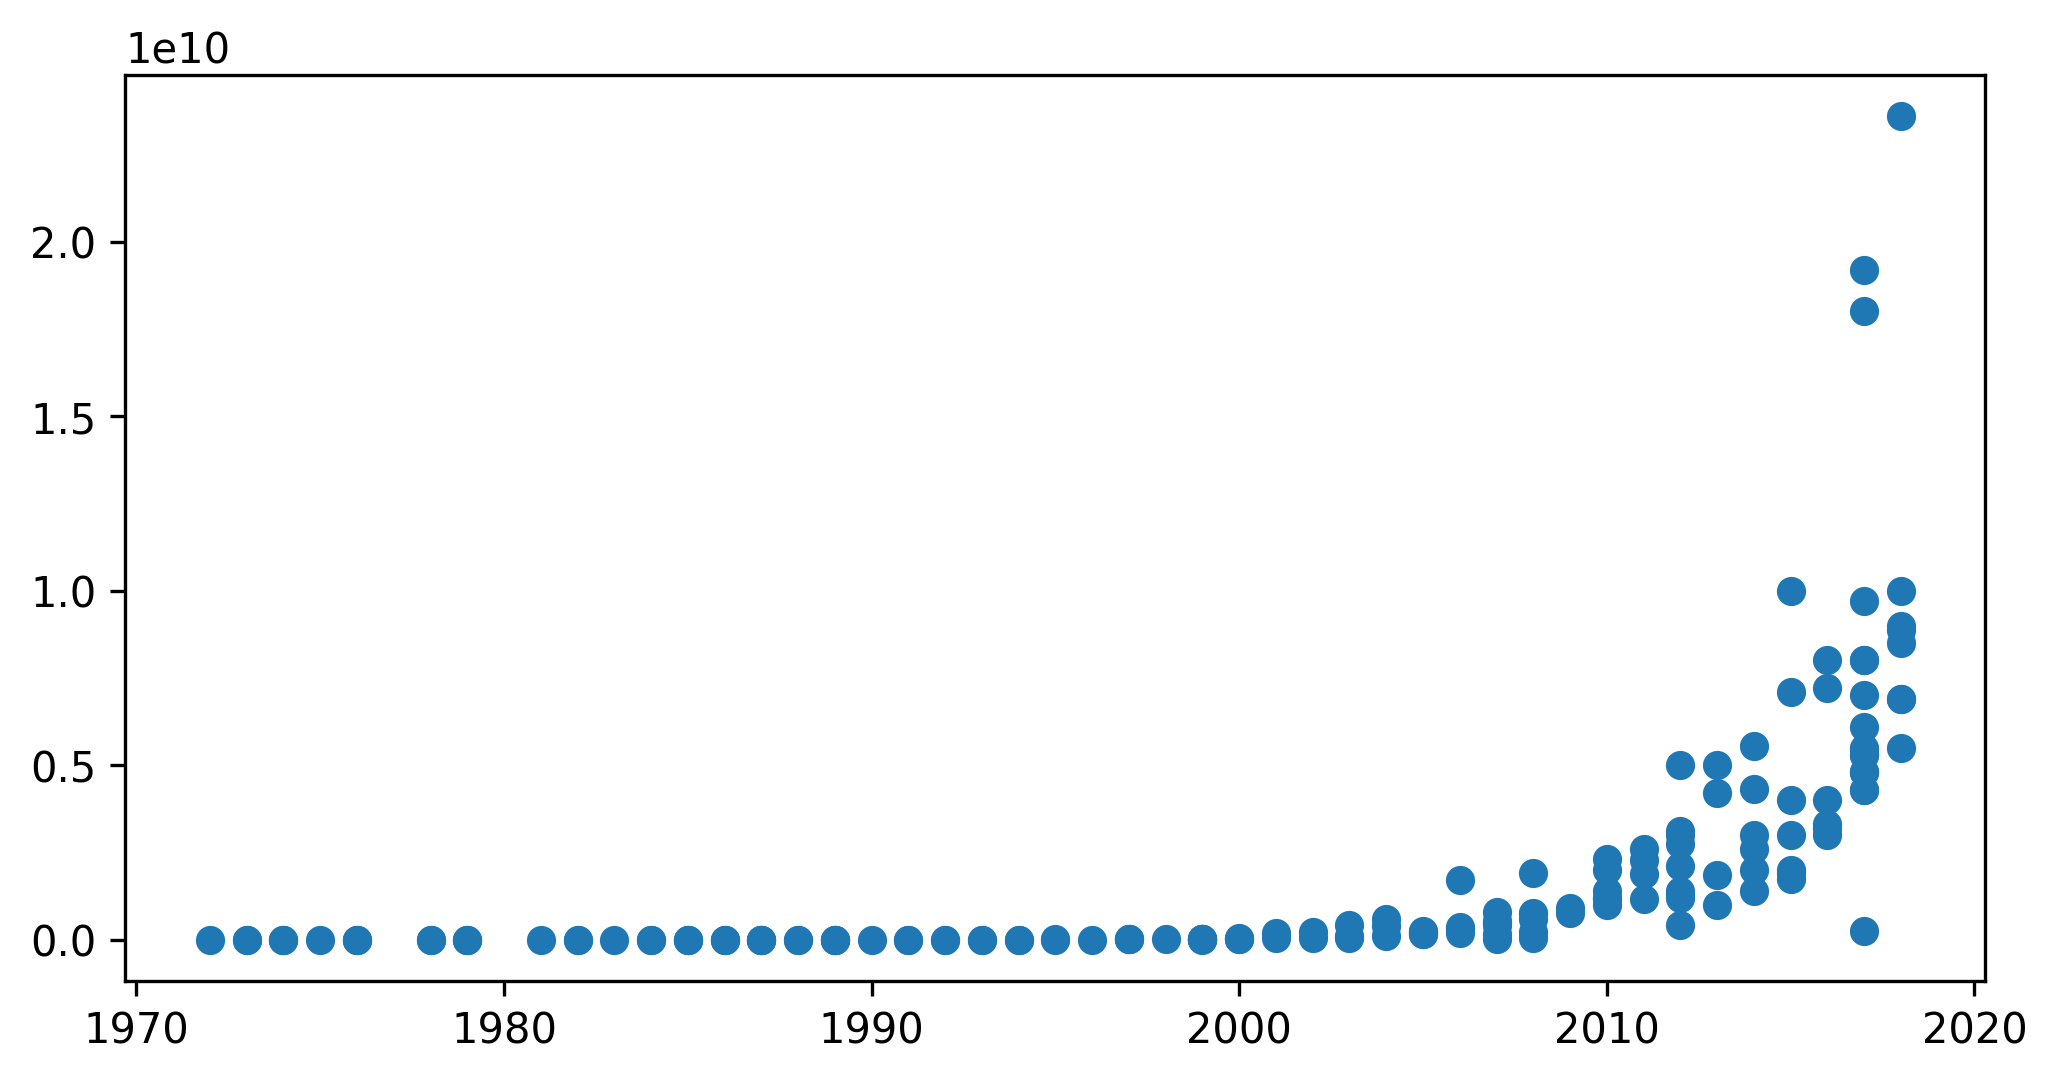

In [11]:
plt.figure(figsize=(8,4),dpi=300)
plt.scatter(X,y)

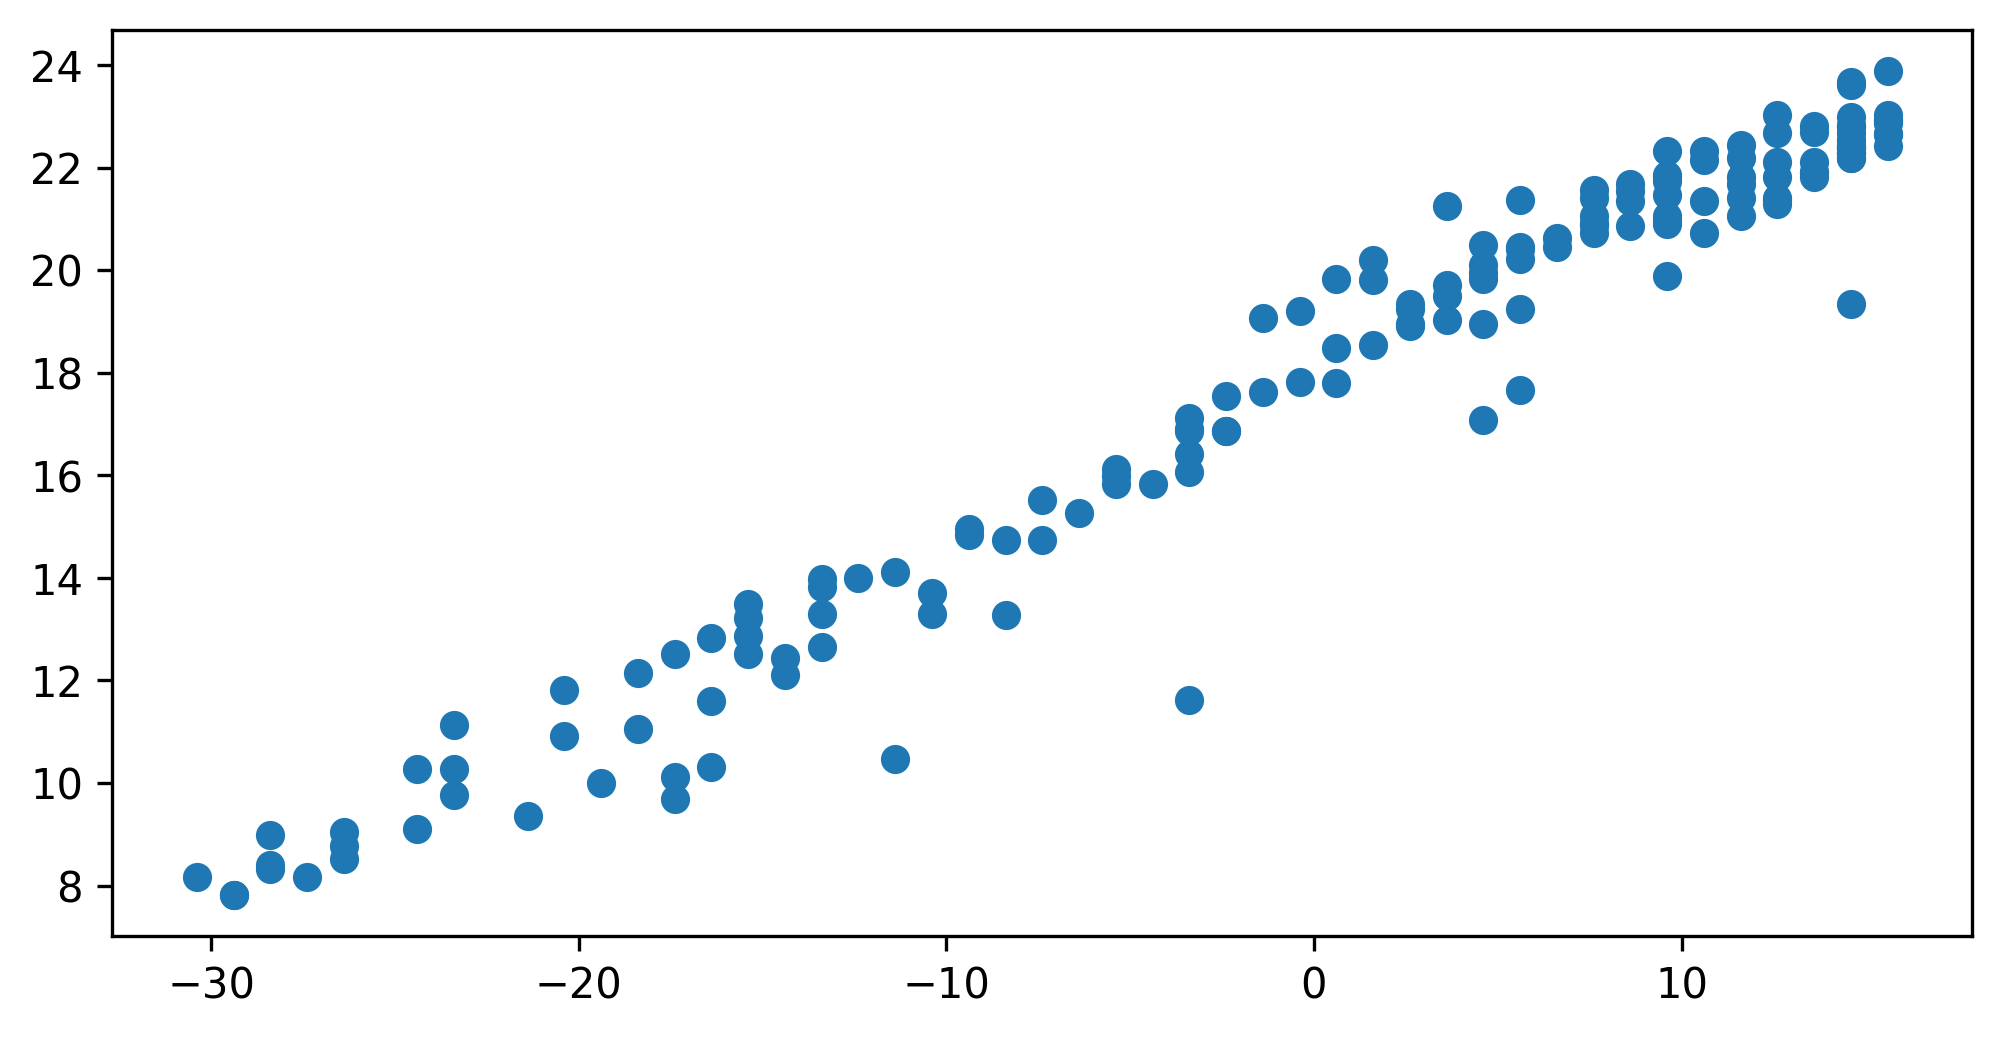

In [28]:
y_log = np.log(y)
plt.figure(figsize=(8,4),dpi=300)
plt.scatter(X,y_log)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15)

In [18]:
X = X - X.mean()

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [26]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')

In [9]:
def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

In [10]:
scheduler =tf.keras.callbacks.LearningRateScheduler(schedule)


In [30]:
r = model.fit(X,y_log,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 5ms/step - loss: 0.9157 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 0.9211 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 5ms/step - loss: 1.0119 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 5ms/step - loss: 2.2051 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 7ms/step - loss: 1.9351 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 5ms/step - loss: 1.7142 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 5ms/step - loss: 3.4033 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 5ms/step - loss: 3.7870 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 2.0785 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 1.6278 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 7ms/step - loss: 1.4273 - lr: 0.00

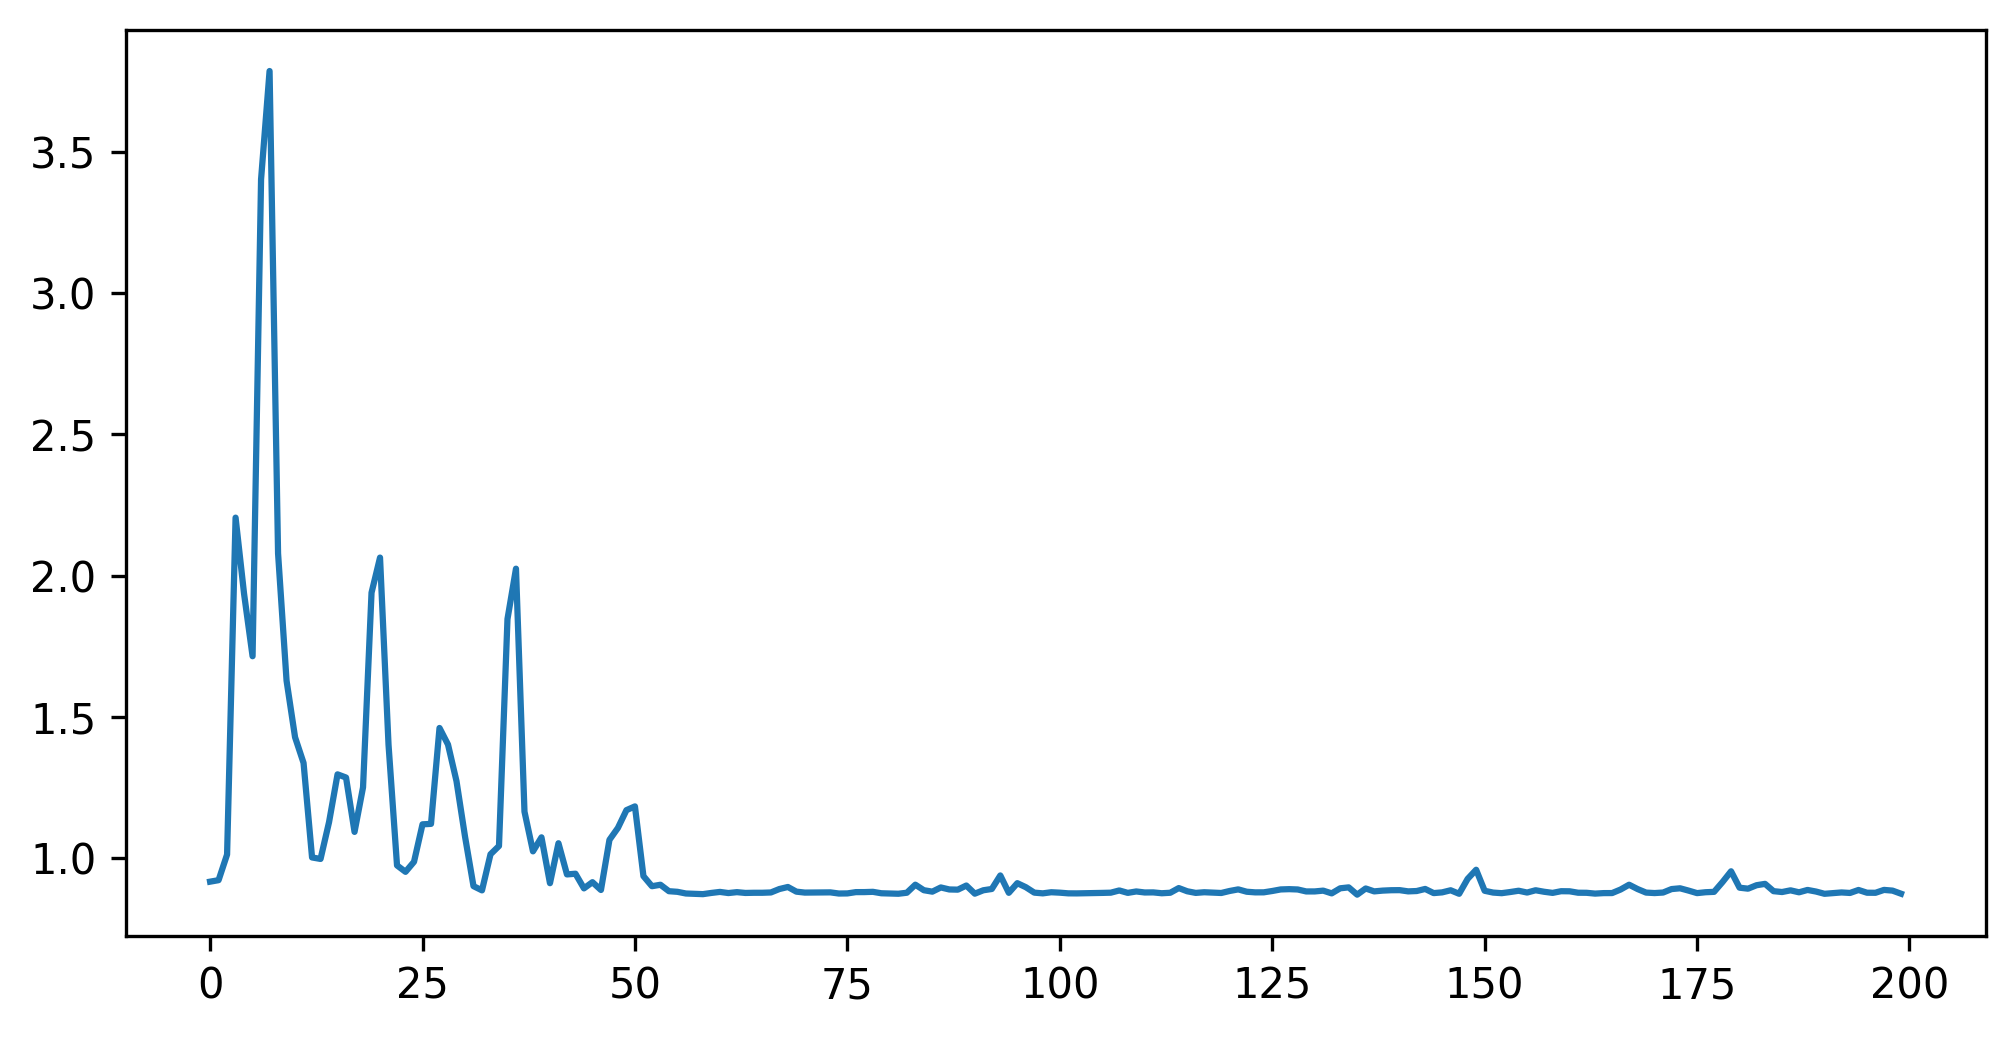

In [31]:
plt.figure(figsize=(8,4),dpi=300)
plt.plot(r.history['loss'],label='loss')

In [13]:
model.layers

In [32]:
model.layers[0].get_weights()[0][0,0]

0.3299943

In [33]:
np.exp(0.3299943)

1.3909601999680443

In [34]:
np.log(2)/0.3299943

2.100482282754415